# Wine Quality Model Gridserach

##### https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

- fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
- residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- chlorides: the amount of salt in the wine
- free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- density: the density of water is close to that of water depending on the percent alcohol and sugar content
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- alcohol: the percent alcohol content of the wine
- quality: output variable (based on sensory data, score between 0 and 10)

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [91]:
wine_data = pd.read_csv('winequality.csv')

In [92]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [77]:
# Create target
wine_data['high_quality'] = [1 if x >=7 else 0 for x in wine_data['quality']]
wine_data['high_quality'].value_counts()

In [80]:
# Split data
X = wine_data.drop(['quality'], axis=1)
y = wine_data['high_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
# Create parameter grid
param_grid = {'C': [.01, .1, 1, 10, 100, 1000, 10000],
                  'gamma': [0.0001, 0.001, 0.01, .1, 1, 10, 100, 1000]}

# Create grid search
grid_search = GridSearchCV(SVC(),
                           param_grid, 
                           cv=5)
# Fit
grid_search.fit(X_train, y_train)

Best parameters: {'C': 100, 'gamma': 0.0001}
Best cross-validation score: 1.00


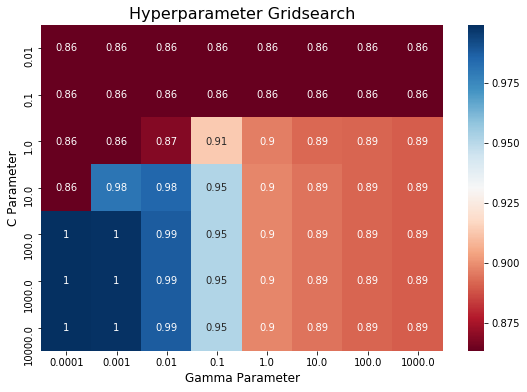

In [99]:
# Pull results from grid search
results = pd.DataFrame(grid_search.cv_results_)
hm_data = results.pivot(index='param_C', 
                   columns='param_gamma',
                   values='mean_test_score')

# Plot
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(hm_data,
                 annot=True,
                 cmap='RdBu',
                 linecolor='white')

ax.set_title('Hyperparameter Gridsearch', fontsize=16)
ax.set_ylabel('C Parameter', fontsize=12)
ax.set_xlabel('Gamma Parameter', fontsize=12)


plt.savefig('wine_heatmap.png')
plt.show()

In [96]:
# Print best parameters and score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.0001}
Best cross-validation score: 1.00


In [98]:
# Plug best parameters into the model, train it, and test on held out data
best_svc = SVC(**grid_search.best_params_).fit(X_train, y_train)
best_svc.score(X_test, y_test)

1.0